In [126]:
import numpy as np
import matplotlib.pyplot as plt

In [127]:
def macher(mu):
    #return (mu-(1/(2+mu))-(mu**2/(2+mu))+np.sqrt((5+9*mu**2+4*mu**3+mu**4)/((2+mu)**2)))
    return np.log((1 + mu**2)/(mu + 2))

 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  5 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value


/var/folders/51/kbj208h515n2q4vb3brs8m_r0000gn/T/ipykernel_24851/1315307738.py:6: RuntimeWarning: divide by zero encountered in log
  xValues = np.log(uDelta)
/opt/homebrew/anaconda3/lib/python3.10/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares

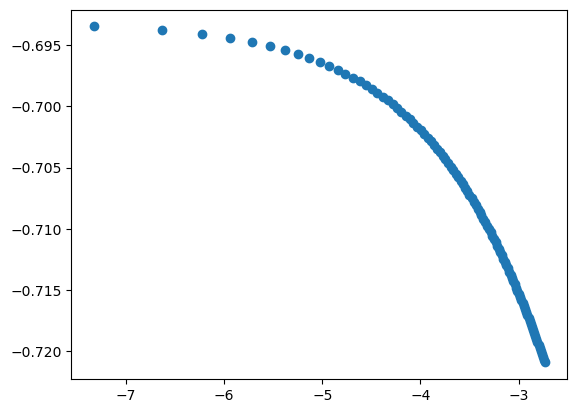

In [128]:
uCritical = 0.066
uOffside = np.linspace(0.001,uCritical,100)
uDelta = np.abs(uOffside-uCritical)

yValues = macher(uDelta)
xValues = np.log(uDelta)

plt.plot(xValues,yValues,'o')

# regression
coeff = np.polyfit(xValues,yValues,1)
# print(coeff)
print(coeff)